## Importing ThinkDSP module
`thinkdsp` has different classes and functions to work with signals

In [1]:
import os

if not os.path.exists('thinkdsp_exercises.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

## Exercise 1.1
If you have Jupyter, load _chap01.ipynb_, read through it, and run the examples.
You can also view this notebook at [ThinkDSP - Chapter 1](http://tinyurl.com/thinkdsp01).

# ===================================================================

## Exercise 1.2
Go to [FreeSound](http://freesound.org) and download a sound sample that includes music, speech, or other sounds that have a well-defined pitch.
Select a roughly half-second segment where the pitch is **constant**.
Compute and plot the **spectrum** of the segment you selected.
What connection can you make between the timbre of the sound and the harmonic structure you see in the spectrum?
Use _high_pass_, _low_pass_, and _band_stop_ to filter out some of the harmonics.
Then convert the spectrum back to a **wave** and listen to it.
How does the sound relate to the changes you made in the spectrum?

In [2]:
# Creating a 'Wave' object using the module
import thinkdsp_exercises as td
filename = 'chap01audio.wav'
wave = td.read_wave(filename)
wave.make_audio()

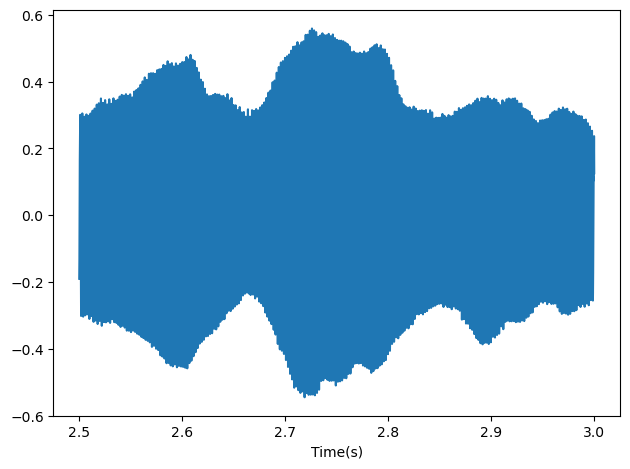

In [3]:
# Setting the start and duration of the segment (s)
start = 2.5
duration = 0.5

segment = wave.segment(start, duration)

# Plot the segment in a graph
segment.plot()
td.decorate(xlabel="Time(s)")

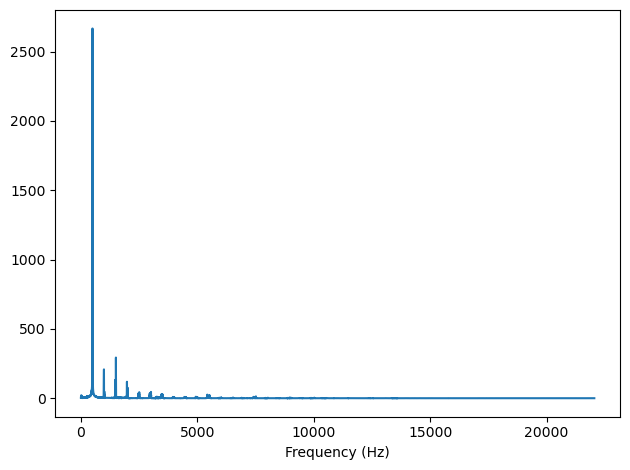

In [4]:
# Create the spectrum of the segment and plot it
spectrum = segment.make_spectrum()
spectrum.plot()
td.decorate(xlabel="Frequency (Hz)")

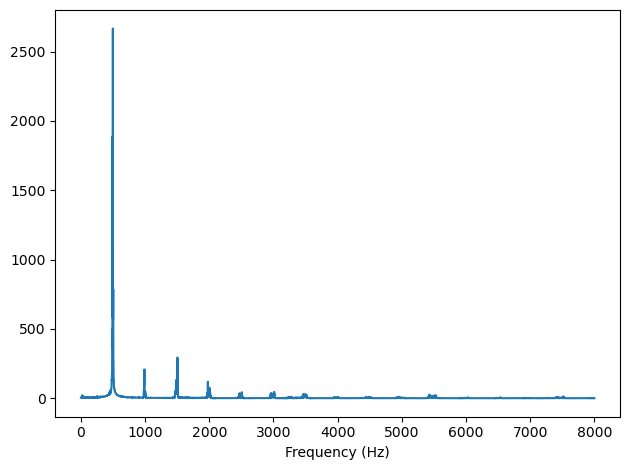

In [5]:
# Cut high non listenable frequencies
spectrum.plot(high=8000)
td.decorate(xlabel="Frequency (Hz)")

In [6]:
# Create different spectrums using the filters (low & high pass and band stop)
low_pass_spectrum = segment.make_spectrum()
low_pass_spectrum.low_pass(1500)

high_pass_spectrum = segment.make_spectrum()
high_pass_spectrum.high_pass(1000)

band_stop_spectrum = segment.make_spectrum()
band_stop_spectrum.band_stop(800,2500)

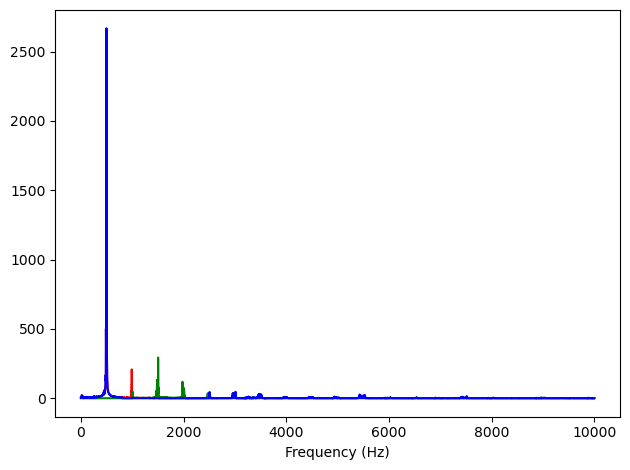

In [7]:
# Plot all the spectrums
low_pass_spectrum.plot(color="red", high=10000)
high_pass_spectrum.plot(color="green", high=10000)
band_stop_spectrum.plot(color="blue", high=10000)

td.decorate(xlabel="Frequency (Hz)")

In [8]:
# Transform 'Spectrum' objects into 'Signal' objects
sig_low = low_pass_spectrum.make_wave()
sig_high = high_pass_spectrum.make_wave()
sig_band = band_stop_spectrum.make_wave()

# Normalize and apodize the segments to avoid clicks and clipping, then transform them into audio again
segment.normalize()
sig_low.normalize()
sig_high.normalize()
sig_band.normalize()

segment.apodize()
sig_low.apodize()
sig_high.apodize()
sig_band.apodize()

Here is the original segment

In [9]:
segment.make_audio()

Here are the filtered versions

In [10]:
# Low pass filtered segment
sig_low.make_audio()

In [11]:
# High pass filtered segment
sig_high.make_audio()

In [12]:
# Band stop filtered segment
sig_band.make_audio()

# ===================================================================

## Exercise 1.3
Synthesize a **compound** signal by creating _SinSignal_ and _CosSignal_ objects and adding them up.
Evaluate the signal to get a _Wave_, and listen to it. Compute its _Spectrum_ and _plot_ it.
What happens if you add frequency components that are **not** multiples of the fundamental?

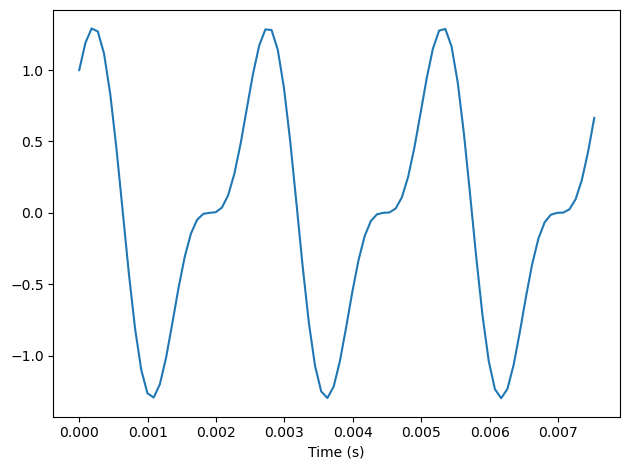

In [13]:
# Creating a cosine signal at 392 Hz (~G4) and a sine signal at 784 Hz (~G5), with the sine having half of the cosine amplitude
sig_cos = td.CosSignal(freq=392, amp=1.0, offset=0)
sig_sin = td.SinSignal(freq=784, amp=0.5, offset=0)

# Summing both signals and plotting
sig_sum = sig_cos + sig_sin
sig_sum.plot()
td.decorate(xlabel="Time (s)")

In [14]:
# Create a 'Wave' object from the signal created beforehand, with 2s of duration and a framerate of 11,025 (standart WAV format)
new_wave = sig_sum.make_wave(duration=2.0, start=0, framerate=11025)
new_wave.make_audio()

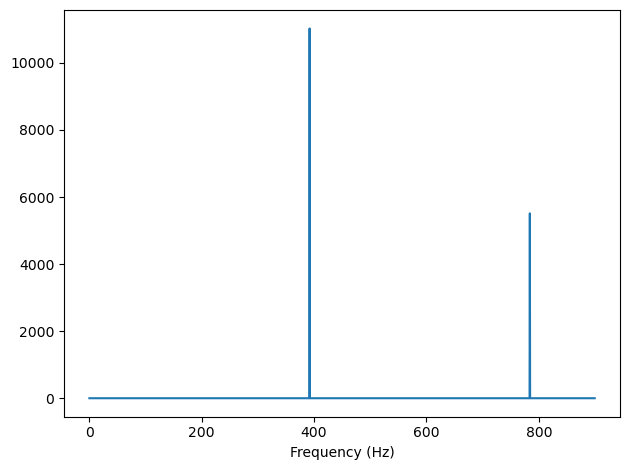

In [15]:
# Create the spectrum of 'new_wave'
new_wave_spectrum = new_wave.make_spectrum()
new_wave_spectrum.plot(high=900)
td.decorate(xlabel="Frequency (Hz)")

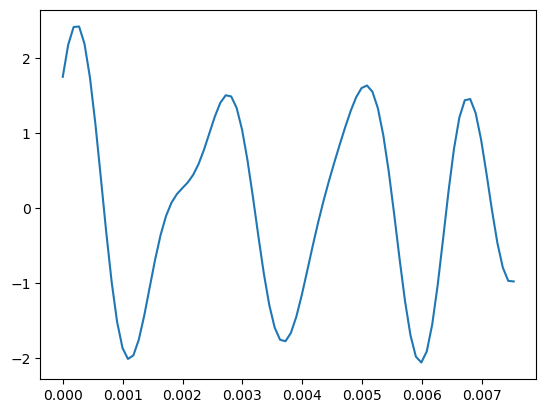

In [16]:
# Adding the major third (B4) and the fifth (D5) to create a G major chord
sig_b4 = td.SinSignal(freq=493.88, amp=1.0, offset=0)
sig_d5 = td.CosSignal(freq=587.33, amp=0.75, offset=0)
sig_sum += sig_d5 + sig_b4

sig_sum.plot()

In [17]:
# Crate the 'Wave' object and the audio
g_major = sig_sum.make_wave(duration=2.0, start=0, framerate=11025)
g_major.make_audio()

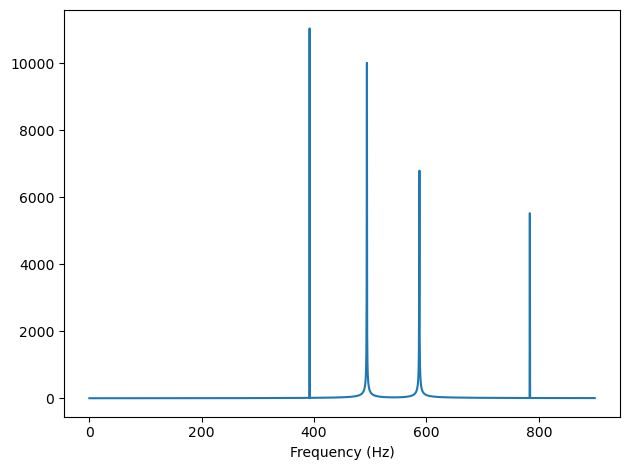

In [18]:
# Create the spectrum of 'g_major'
g_major_spectrum = g_major.make_spectrum()
g_major_spectrum.plot(high=900)
td.decorate(xlabel="Frequency (Hz)")

# ===================================================================

## Exercise 1.4
Write a function called _stretch_ that takes a _Wave_ and a stretch factor and _speeds up_ or _slows down_ the wave by modifying ts and framerate.
**Hint**: it should only take two lines of code.

In [19]:
# Slows down the wave by half
g_major.stretch(0.5)
g_major.make_audio()

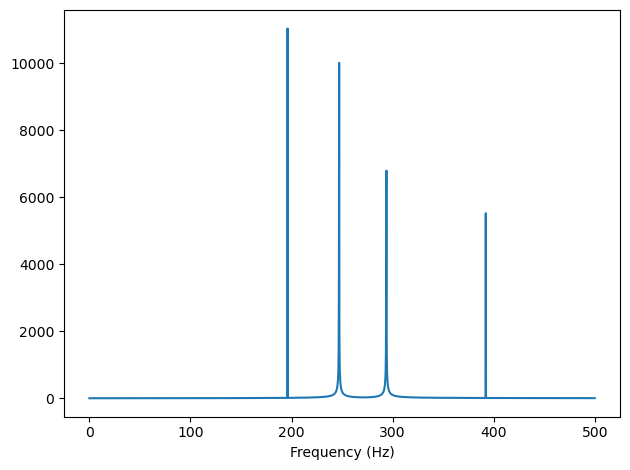

In [20]:
# Recreates the spectrum
stretched_spectrum = g_major.make_spectrum()
stretched_spectrum.plot(high=500)
td.decorate(xlabel="Frequency (Hz)")